In [1]:
from sklearn import datasets, model_selection, svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing as pp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
##Prepare data##

filename=r'drone_delivery.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')
data_train=data_train.drop(['clientid'], axis=1)
data_train=data_train.dropna()
colnames = data_train.columns.get_values()
print(colnames)
print(data_train.head(10))

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.describe().to_excel(r'original_Describe.xlsx')

X=data_train['x']
y=data_train['y']
print(data_train.shape)
print(y.shape)

['x' 'y']
            x           y
0  622.771572  164.857623
1  416.357298  630.193634
2  292.735020  567.333231
3  737.211288  166.225676
4  540.475375  682.912298
5  535.469492  318.439661
6  640.380050  870.833221
7  235.772075  359.048203
8  481.896884  661.491838
9  730.032789  312.177817

DESCRIBE DATA:
                  x            y
count  5956.000000  5956.000000
mean    508.823177   427.554772
std     271.061462   289.044640
min       0.017692     0.043285
25%     282.582920   170.079921
50%     518.100892   397.786441
75%     727.156497   669.982518
max     999.533215   999.731720
(5956, 2)
(5956,)


In [3]:
   # Finalize and render the figure


# 1.

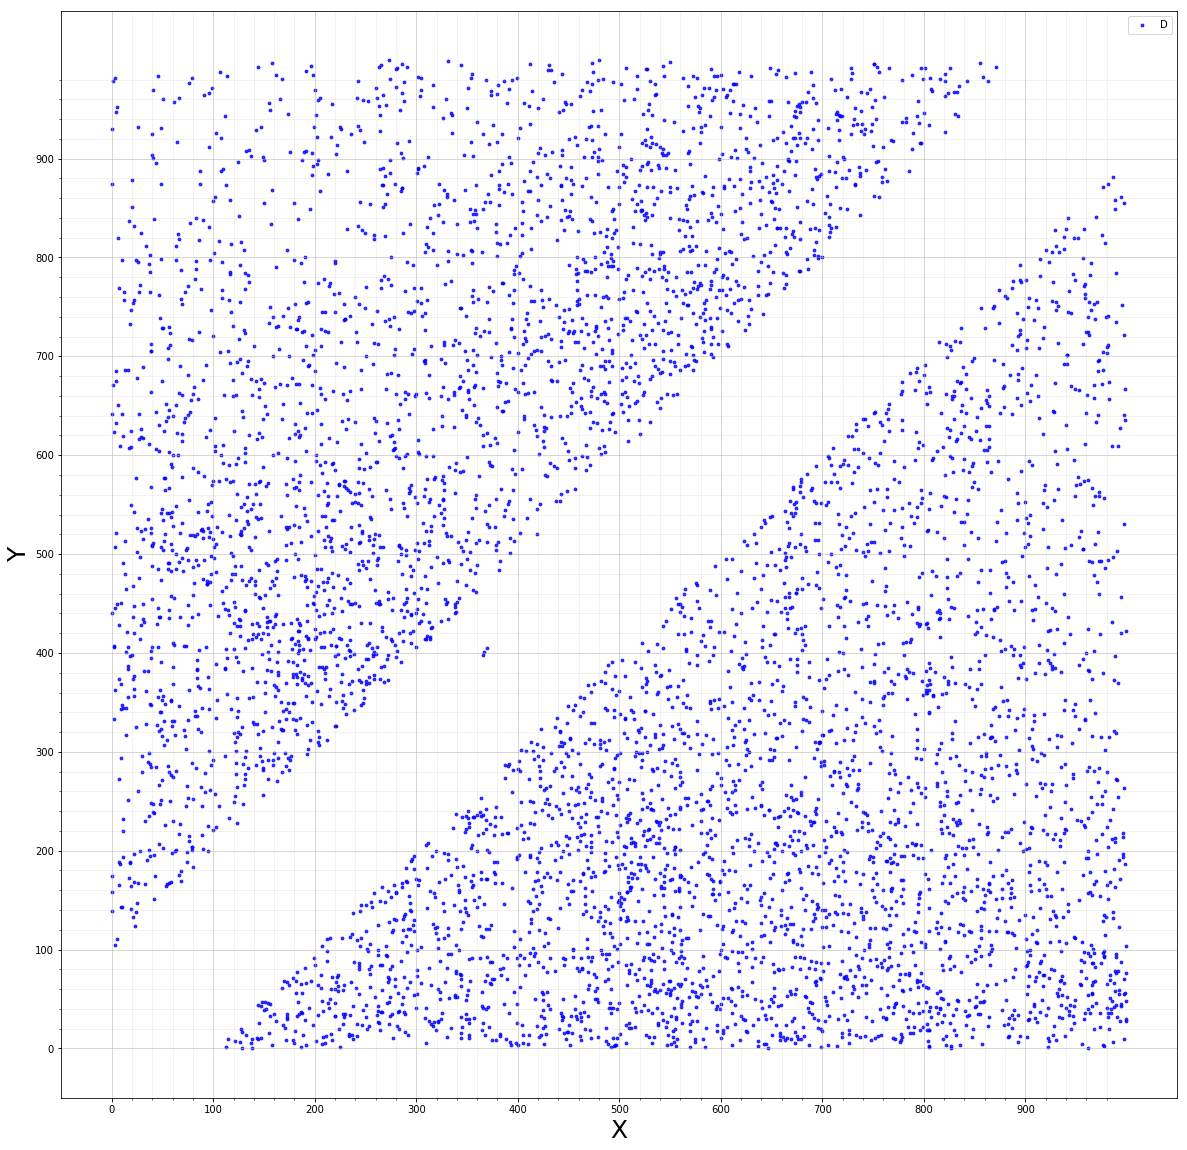

In [4]:
###SCATTER XY####

ax=data_train.plot(kind="scatter", x="x", y="y",
    s=8,
    c="blue", alpha=0.8, figsize=(20,20),
)


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.legend("Drone XYlllll")
plt.show()

#### checking optiaml amount of clasters

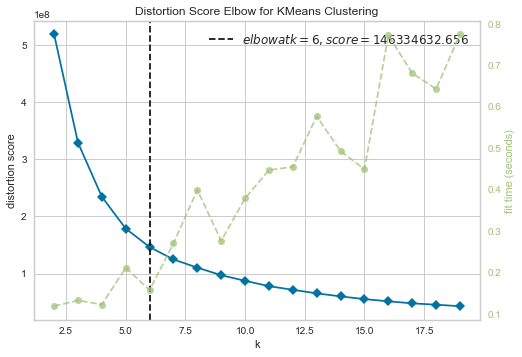

In [5]:
###Elbow method###
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(data_train)        # Fit the data to the visualizer
visualizer.show()   

# 2. and 3.

(5956, 3)
(5956, 3)
0 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0
(5956, 3)
1 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


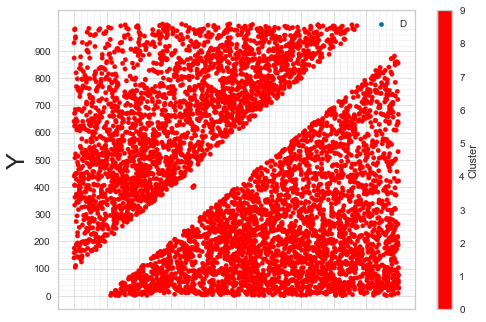

(5956, 2)
2 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


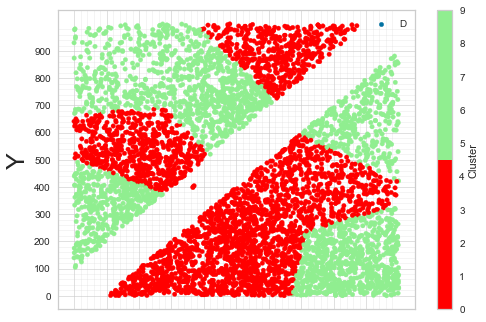

(5956, 2)
3 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


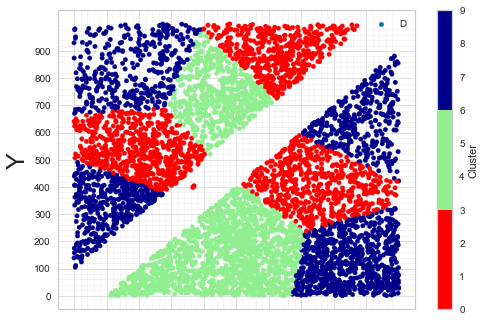

(5956, 2)
4 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


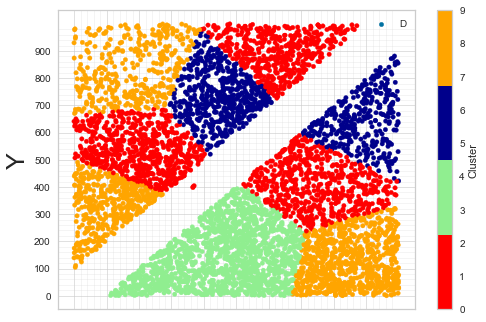

(5956, 2)
5 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


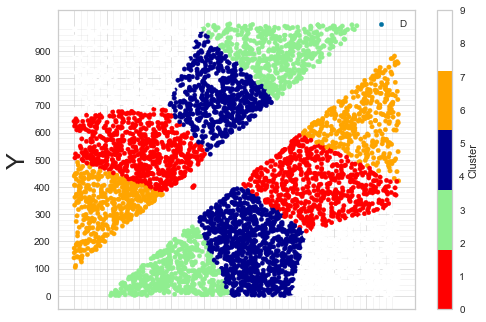

(5956, 2)
6 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


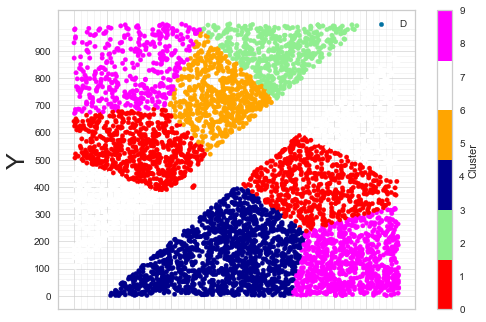

(5956, 2)
7 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


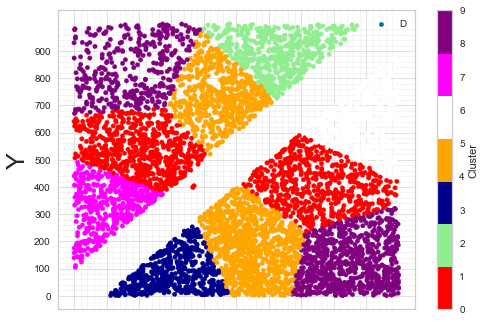

(5956, 2)
8 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


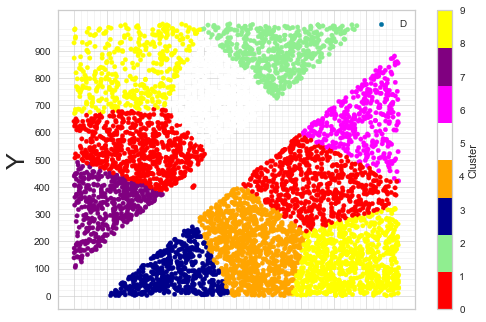

(5956, 2)
9 CLUSTERS:
             x           y  Cluster
0  622.771572  164.857623        4
1  416.357298  630.193634        5
2  292.735020  567.333231        1
3  737.211288  166.225676        8
4  540.475375  682.912298        5
5  535.469492  318.439661        4
6  640.380050  870.833221        2
7  235.772075  359.048203        7
8  481.896884  661.491838        5
9  730.032789  312.177817        0


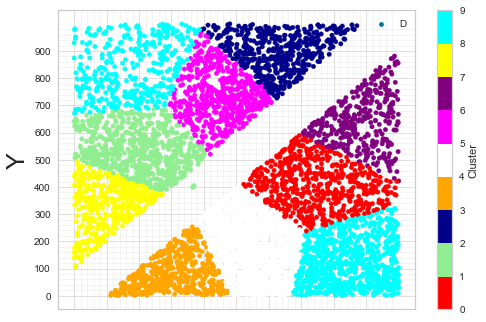

In [15]:
###Making model####
trainSet = data_train

###K-Means clustering###FIT AND PREDICT
from sklearn import cluster
num_clusters = 10
print(data_train.shape)
for i in range (num_clusters):
    print(data_train.shape)
    centroids_df={}
    centroidHelper=data_train
    kmeans = cluster.KMeans(n_clusters=num_clusters,random_state=1,max_iter=1000)
    kmeans.fit(data_train)
    predict=kmeans.predict(data_train)

    centroids = kmeans.cluster_centers_

    filename="_DataClusters",str(1),".CSV"
    
    ###print dataframe with cluster ###
    centroidHelper['Cluster'] = pd.DataFrame(predict, index=centroidHelper.index)
    
    print((i),"CLUSTERS:\n",data_train.head(10))
    ###SCATTER clusters in different colors
    
    if (i>0):
        colors = ['red','LightGreen','DarkBlue','orange','white','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
        ax=data_train.plot.scatter(x='x', y='y', c = 'Cluster', cmap = matplotlib.colors.ListedColormap(colors[:i]) )


        ##Initializing grid
        major_ticks = np.arange(0, 1000, 100)
        minor_ticks = np.arange(0, 1000, 20)

        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)

        # And a corresponding grid
        ax.grid(which='both')

        # Or if you want different settings for the grids:
        ax.grid(which='minor', alpha=0.2)
        ax.grid(which='major', alpha=0.5)


        plt.grid(True)
        plt.ylabel("Y", fontsize=25)
        plt.xlabel("X", fontsize=25)
        plt.legend("Drone XYlllll")
        plt.show()
        ##Reset cluster index
        centroidHelper.drop(['Cluster'],axis=1)
        data_train=data_train.drop(['Cluster'], axis=1)

In [7]:
###FOR LATER USE###
###Cluster item count###
print("CLUSTER ITEM COUNT:")
print("Cluster 0 =",np.sum(predict==0))
print("Cluster 1 =",np.sum(predict==1))
print("Cluster 2 =",np.sum(predict==2))
print("Cluster 3 =",np.sum(predict==3))
print("Cluster 4 =",np.sum(predict==4))
print("Cluster 5 =",np.sum(predict==5))
print("Cluster 6 =",np.sum(predict==6))
print("Cluster 7 =",np.sum(predict==7))

CLUSTER ITEM COUNT:
Cluster 0 = 624
Cluster 1 = 704
Cluster 2 = 512
Cluster 3 = 526
Cluster 4 = 981
Cluster 5 = 579
Cluster 6 = 373
Cluster 7 = 452


# 4.

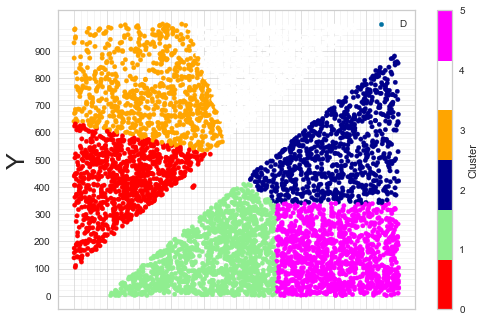

In [14]:
###SCATTER clusters in different colors

colors = ['red','LightGreen','DarkBlue','orange','white','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
ax=data_train.plot.scatter(x='x', y='y', c = 'Cluster', cmap = matplotlib.colors.ListedColormap(colors[:num_clusters]) )


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.legend("Drone XYlllll")
plt.show()

# 5.

(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)


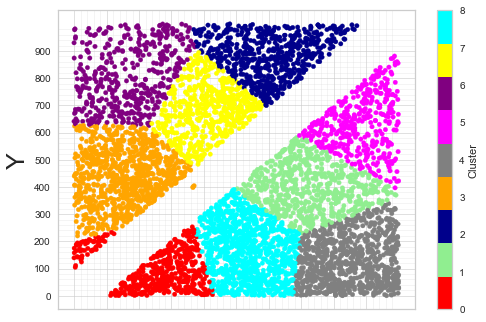

In [17]:
from sklearn import cluster
num_clusters = 9
print(data_train.shape)
for i in range (num_clusters):
    print(data_train.shape)
    centroids_df={}
    centroidHelper=data_train
    kmeans = cluster.KMeans(n_clusters=num_clusters,random_state=1,max_iter=1000)
    kmeans.fit(data_train)
    predict=kmeans.predict(data_train)

    centroids = kmeans.cluster_centers_

    filename="_DataClusters",str(1),".CSV"
    
    ###print dataframe with cluster ###
    centroidHelper['Cluster'] = pd.DataFrame(predict, index=centroidHelper.index)
    
    
###SCATTER clusters in different colors

colors = ['red','LightGreen','DarkBlue','orange','gray','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
ax=data_train.plot.scatter(x='x', y='y', c = 'Cluster', cmap = matplotlib.colors.ListedColormap(colors[:num_clusters]) )


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.show()

# 6.

(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
(5956, 3)
            x           y  labels
0  622.771572  164.857623       3
1  416.357298  630.193634       0
2  292.735020  567.333231       0
3  737.211288  166.225676       3
4  540.475375  682.912298       4
5  535.469492  318.439661       1
6  640.380050  870.833221       4
7  235.772075  359.048203       0
8  481.896884  661.491838       0
9  730.032789  312.177817       1


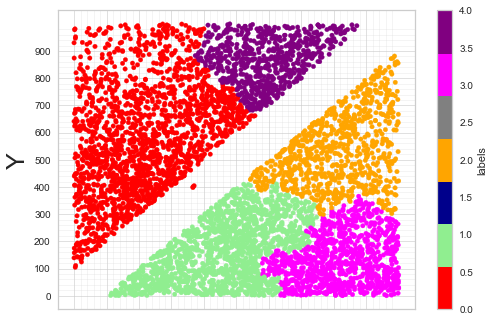

In [32]:
data_train = data_train.drop('Cluster', axis=1)
from sklearn import cluster
num_clusters = 7
print(data_train.shape)
for i in range (num_clusters):
    print(data_train.shape)
    centroids_df={}
    centroidHelper=data_train
    Agglo = cluster.AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
    Agglo.fit(data_train)
    labels = Agglo.labels_
    data_train['labels'] = labels
print(data_train.head(10))
    
###SCATTER clusters in different colors

colors = ['red','LightGreen','DarkBlue','orange','gray','magenta','purple','yellow','cyan','DarkGreen','LightGreen']
ax=data_train.plot.scatter(x='x', y='y', c = 'labels', cmap = matplotlib.colors.ListedColormap(colors[:num_clusters]) )


##Initializing grid
major_ticks = np.arange(0, 1000, 100)
minor_ticks = np.arange(0, 1000, 20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


plt.grid(True)
plt.ylabel("Y", fontsize=25)
plt.xlabel("X", fontsize=25)
plt.show()